# Trees Structures


## Binary Trees
In computer science, a binary tree is a tree data structure in which each node has at most two children, referred to as the ***left*** child and the ***right*** child. 

### `BinaryTreeNode` class definition

Like `LinkedList` class first we define a class for nodes. But unlike `LinkedListNode`, `BinaryTreeNode` have __two__ pointers to other nodes namely `left` and `right`.

A binary tree is called ***proper*** if each node has either
zero or two children. 
Thus, in a proper binary tree, every internal node has exactly two children.
A binary tree that is not proper is called ***improper***.

In [531]:
class BinaryTreeNode:
    left = None
    right = None

    def __init__(self, data):
        self.data = data

```mermaid
graph 
    subgraph node1[BinaryTreeNode]
            data1[data]
            left1[left]
            right1[right]
        end
left1 --> None1[None]
right1 --> None2[None]
```

In [532]:
node1 = BinaryTreeNode(2)
node2 = BinaryTreeNode(3)
node3 = BinaryTreeNode(5)
node1.left = node2
node1.right = node3

In [533]:
node1.data, node1.left.data, node1.right.data

(2, 3, 5)

### `BinaryTree` class definition

Initially `BinaryTree` object will have only one attribute namely `root` which defaults to `None` meaning that the list is empty.

In [534]:
class BinaryTree:
    root: BinaryTreeNode | None = None

```mermaid
graph 
    subgraph BinaryTree
            root
        end
    root --> None
```

After initialization of a `BinaryTree` object, we create and set the root node and the remaining nodes as follows:

In [535]:
tree1 = BinaryTree()
tree1.root = BinaryTreeNode(1)
tree1.root.left = BinaryTreeNode(2)
tree1.root.right = BinaryTreeNode(3)
tree1.root.left.left = BinaryTreeNode(4)

```mermaid
graph 
    subgraph BinaryTree
            root
        end
    subgraph node1[BinaryTreeNode]
            data1[1]
            left1[left]
            right1[right]
        end
    subgraph node2[BinaryTreeNode]
            data2[2]
            left2[left]
            right2[right]
        end
    subgraph node3[BinaryTreeNode]
            data3[3]
            left3[left]
            right3[right]
        end
    subgraph node4[BinaryTreeNode]
            data4[4]
            left4[left]
            right4[right]
        end
    root --> node1
left1 --> node2
right1 --> node3
left2 --> node4
right2 --> None2[None]
left3 --> None7[None]
right3 --> None4[None]
left4 --> None5[None]
right4 --> None6[None]
```

In [536]:
tree1.root.data, tree1.root.left.data, tree1.root.right.data, tree1.root.left.left.data

(1, 2, 3, 4)

### List the nodes when representing the `BinaryTree` object

If you just write an object to the Python interpretor, Python calls `repr` function on the object.

In [537]:
tree1

Now we want to change the behavior of `repr` function to list the nodes of the `BinaryTree` object. For this we need to re-implement `__repr__` method.

In [538]:
class BinaryTreeNode(BinaryTreeNode):
    def __repr__(self):
        return repr(self.data)

    def __str__(self):
        if self.left is None and self.right is None:
            return str(self.data)

        return f"{self.data}({self.left},{self.right})"


class BinaryTree(BinaryTree):
    def __repr__(self):
        return str(self.root)

In [539]:
tree1 = BinaryTree()
tree1.root = BinaryTreeNode(1)
tree1.root.left = BinaryTreeNode(2)
tree1.root.right = BinaryTreeNode(3)
tree1.root.right.left = BinaryTreeNode(4)
tree1.root.right.right = BinaryTreeNode(5)

In [540]:
tree1

1(2,3(4,5))

## Ordered `BinaryTree` (`BinarySearchTree`)
A Binary Tree is __ordered__ if the data of each node being **greater** than all the nodes in the respective node's **left** subtree and less than the ones in its right subtree.

In [541]:
class BinarySearchTreeNode(BinaryTreeNode):
    def __lt__(self, node: BinaryTreeNode):
        return node is None or self.data < node.data

    def __gt__(self, node: BinaryTreeNode):
        return node is None or self.data > node.data

    def add_node(self, node):
        if self > node:
            if self.left is None:
                self.left = node
            else:
                self.left.add_node(node)
        if self < node:
            if self.right is None:
                self.right = node
            else:
                self.right.add_node(node)


class BinarySearchTree(BinaryTree):
    def add_node(self, value):
        node = BinarySearchTreeNode(value)
        if self.root is None:
            self.root = BinarySearchTreeNode(value)
        else:
            self.root.add_node(node)


bst1 = BinarySearchTree()
bst1.add_node(5)
bst1.add_node(2)
bst1.add_node(21)
bst1.add_node(41)
bst1.add_node(20)
bst1

5(2,21(20,41))

## Exercise: Search `BinarySearchTree`

In [542]:
def search_ordered_tree(tree: BinarySearchTree, value) -> BinarySearchTreeNode | None:
    node = tree.root
    while node is not None:
        if value == node.data:
            return node
        if value < node.data:
            node = node.left
        else:
            node = node.right


print(search_ordered_tree(bst1, 21))

21(20,41)


## Exercise: Test if a `BinaryTree` is ordered

In [543]:
class BinaryTreeNode(BinaryTreeNode):
    def __lt__(self, node: BinaryTreeNode):
        return node is None or self.data < node.data

    def __gt__(self, node: BinaryTreeNode):
        return node is None or self.data > node.data


def is_ordered_node(node: BinaryTreeNode) -> True | False:
    if node is None:
        return True
    if node.left < node < node.right:
        return is_ordered_node(node.left) and is_ordered_node(node.right)
    return False


def is_ordered_tree(tree: BinaryTree) -> True | False:
    return is_ordered_node(tree.root)

In [544]:

tree1 = BinaryTree()
tree1.root = BinaryTreeNode(1)
tree1.root.left = BinaryTreeNode(2)
tree1.root.right = BinaryTreeNode(3)
tree1.root.right.left = BinaryTreeNode(4)
tree1.root.right.right = BinaryTreeNode(5)

is_ordered_tree(tree1)

False

In [545]:
tree2 = BinaryTree()
tree2.root = BinaryTreeNode(9)
tree2.root.left = BinaryTreeNode(5)
tree2.root.right = BinaryTreeNode(16)
tree2.root.right.left = BinaryTreeNode(10)
tree2.root.right.right = BinaryTreeNode(25)
is_ordered_tree(tree2)

True

### Exercise: Iterating over the nodes.
We can iterate over the binary tree recursively on nodes.

In [546]:
class BinaryTreeNode(BinaryTreeNode):
    def __iter__(self):
        yield self
        if self.left is not None:
            for node in iter(self.left):
                yield node
        if self.right is not None:
            for node in iter(self.right):
                yield node


class BinaryTree(BinaryTree):
    def __iter__(self):
        if self.root is not None:
            return iter(self.root)

In [547]:
tree1 = BinaryTree()
tree1.root = BinaryTreeNode(1)
tree1.root.left = BinaryTreeNode(2)
tree1.root.right = BinaryTreeNode(3)
tree1.root.left.left = BinaryTreeNode(4)
tree1.root.left.right = BinaryTreeNode(5)

In [548]:
list(tree1)

[1, 2, 4, 5, 3]

## Tree
For general trees instead of `left` and `right` attributes, we define `children` attribute as a list. If `children` attribute is empty `TreeNode` is a **leaf**.

```mermaid
graph 
    subgraph node1[TreeNode]
        data1[data]
        children1[children]
    end
    subgraph children2list[ ]
    end

children1 --> children2list
```

In [549]:
class TreeNode():
    children: list

    def is_leaf(self):
        return len(self.children) == 0

    def __init__(self, data=None):
        self.data = data
        self.children = []

    def __repr__(self):
        return repr(self.data)

    def __str__(self):
        if self.is_leaf():
            return str(self.data)

        return f"{self.data}({','.join(map(str,self.children))})"

    def __iter__(self):
        yield self
        for child in self.children:
            for node in child:
                yield node

    def __getitem__(self, position: int):
        return self.children[position]

    def append(self, value):
        self.children.append(node := TreeNode(value))
        return node

    def extend(self, values):
        self.children.extend(map(TreeNode, values))

In [550]:

class Tree:
    def __init__(self) -> None:
        self.root = None

    def __repr__(self):
        return str(self.root)

    def __iter__(self):
        if self.root is not None:
            return iter(self.root)

An example `Tree`
```mermaid
graph 
    subgraph Tree
        root
    end
    subgraph node1[TreeNode]
        data1[data]
        children1[children]
    end
    subgraph children2list[ ]
        subgraph node2[TreeNode]
            data2[data]
            children2[children]
        end
        subgraph node3[TreeNode]
            data3[data]
            children3[children]
        end
        subgraph node4[TreeNode]
            data4[data]
            children4[children]
        end
    end
    subgraph children4list[ ]
        subgraph node5[TreeNode]
            data5[data]
            children5[children]
        end
    end
    subgraph children3list[ ]
    end
    subgraph children5list[ ]
    end
    subgraph children6list[ ]
    end
    root --> node1

children1 --> children2list
children2 --> children3list
children3 --> children4list
children4 --> children5list
children5 --> children6list
```

In [568]:
tree2 = Tree()
tree2.root = TreeNode("/")
tree2.root.extend(["bin","lib","usr"])
tree2.root[2].append("lib32")
tree2.root[2].append("lib64")
tree2.root[2][1].append("kernel")
tree2

/(bin,lib,usr(lib32,lib64(kernel)))

### Exercise: `Tree` from its string representaiton

In [569]:
class Tree(Tree):
    @classmethod
    def from_string(cls, data, typ=str):
        tree = Tree()

        parent = None
        a = ""
        for c in data:
            if c in ",() ":
                if a:
                    node = TreeNode(typ(a))
                    a = ""
                    if parent is None:
                        tree.root = node
                    else:
                        parent.children.append(node)
                    node.parent = parent
                    if c == "(":
                        parent = node
                    elif c == ")":
                        parent = parent.parent
            else:
                a += c

        return tree

In [570]:
tree = Tree.from_string("0(1,2(5(6)),3,4)")
tree

0(1,2(5(6),3,4))

## Exercise: Pretty Print `Tree`

In [571]:
def pprint(node, level=0):
    print("--"*level, repr(node), sep="")
    for node in node.children:
        pprint(node, level=level+1)

In [572]:
python_builtin_types = TreeNode("Python Builtin Types")

collection = python_builtin_types.append("COLLECTION ( x in a )")
# contextmanager = root.append("contextmanager ( __enter__ , __exit__ )")

collection.append("iter")
collection.append("enumerate")
collection.append("map")
collection.append("reversed")
collection.append("filter")

finite = collection.append("FINITE ( len(a) )")
# infinite = collection.append("INFINITE")

finite.append("set")
finite.append("frozenset")

sequences = finite.append("SEQUENCE ( a[i] )")
mapping=finite.append("MAPPING ( a[k] , a[k] = x )")
mapping.append("dict")

sequences.append("tuple")
sequences.append("bytes")
sequences.append("str")
sequences.append("range")

mut_sequences = sequences.append("MUTABLE SEQUENCE ( a[i] = x )")
mut_sequences.append("list")
mut_sequences.append("bytearray")
mut_sequences.append("memoryview")

pprint(python_builtin_types)

'Python Builtin Types'
--'COLLECTION ( x in a )'
----'iter'
----'enumerate'
----'map'
----'reversed'
----'filter'
----'FINITE ( len(a) )'
------'set'
------'frozenset'
------'SEQUENCE ( a[i] )'
--------'tuple'
--------'bytes'
--------'str'
--------'range'
--------'MUTABLE SEQUENCE ( a[i] = x )'
----------'list'
----------'bytearray'
----------'memoryview'
------'MAPPING ( a[k] , a[k] = x )'
--------'dict'


### Exercise: Use `graphviz` modulke to draw a `Tree`

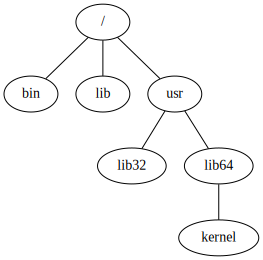

In [573]:
import graphviz


def draw_tree_node(node: TreeNode, dot=None):
    dot = dot or graphviz.Graph()
    dot.node(a := str(node.data))
    for child in node.children:
        draw_tree_node(child, dot)
        dot.edge(a, str(child.data))
    return dot


draw_tree_node(tree2.root)

##  `DoublyLinkedTree`
Like `DoublyLinkedList` we can also define `DoublyLinkedTree`. For this we need to re-implement class `TreeNode` as `TreeNode2` and add the `parent` attribute.

In [574]:
class TreeNode2(TreeNode):
    parent = None

    def append(self, data):
        node = TreeNode2(data)
        self.children.append(node)
        node.parent = self

and instead of `BinaryTree` class we now define `DoublyLinkedBinaryTree` class using `BinaryTreeNode2`.

In [575]:
class DoublyLinkedTree(Tree):
    root: TreeNode2 | None = None

An example `DoublyLinkedTree`
```mermaid
graph 
    subgraph DoublyLinkedTree
        root
    end
    subgraph node1[TreeNode2]
        data1[data]
        children1[children]
        parent1[parent]
    end
    subgraph children2list[ ]
        subgraph node2[TreeNode2]
            data2[data]
            children2[children]
            parent2[parent]
        end
        subgraph node3[TreeNode2]
            data3[data]
            children3[children]
            parent3[parent]
        end
        subgraph node4[TreeNode2]
            data4[data]
            children4[children]
            parent4[parent]
        end
    end
    subgraph children4list[ ]
        subgraph node5[TreeNode2]
            data5[data]
            children5[children]
            parent5[parent]
        end
    end
    subgraph children3list[ ]
    end
    subgraph children5list[ ]
    end
    subgraph children6list[ ]
    end
    root --> node1

children1 --> children2list
children2 --> children3list
children3 --> children4list
children4 --> children5list
children5 --> children6list
None1[None] --- parent1
node1 --- parent2
node1 --- parent3
node1 --- parent4
node3 --- parent5
```

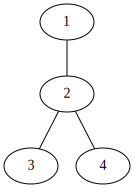

In [576]:
tree3 = DoublyLinkedTree()
tree3.root = TreeNode2(1)
tree3.root.append(2)
tree3.root[0].append(3)
tree3.root[0].append(4)
draw_tree_node(tree3.root)
# tree3

### Exercise: Finding The `root` of a `DoublyLinkedTree`
Given a `TreeNode2`, we can easily calculate the `root` of a `DoublyLinkedTree` recursively.

In [577]:
def get_root(node: TreeNode2):
    if node.parent is None:
        return node
    return get_root(node.parent)

In [578]:
get_root(tree3.root[0][0])

1

### Exercise: Finding The `depth` of a `TreeNode2`
`depth` of a `TreeNode` is the number of ancestors of it, excluding itself. For a `TreeNode2` we can easily calculate the `depth` recursively.


In [579]:
def find_depth(node: TreeNode2) -> int:
    if node.parent is None:
        return 0
    return 1 + find_depth(node.parent)

In [580]:
find_depth(tree3.root[0][0])

2

## Length and Height of a tree
We define the `length` of a tree as the total number of nodes in that tree. The `height` of a tree is the maximum depth int that tree.

In [581]:
class Tree(Tree):
    def length(self, node=...):
        "recursive definition of length of a tree or node"
        if node is ...:
            node = self.root
            if node is None:
                return 0
        return 1 + sum(map(self.length, node.children))

    def height(self, node=...) -> int:
        "recursive definition of height of a tree or node"
        if node is ...:
            node = self.root
            if node is None:
                return 0
        return 1 + max(map(self.height, node.children), default=-1)

    __len__ = length

In [582]:
tree2.__class__ = Tree


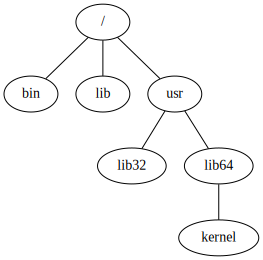

In [583]:
draw_tree_node(tree2.root)

In [585]:
tree2.height(), tree2.length()

(3, 7)

## More on `BinaryTree`
### A Formula relating the `height` and `length` of a `BinaryTree`

`BinaryTree` objects have several interesting properties dealing with relationships between their `height` and `length`.
We denote the set of all nodes of a tree at the same depth $d$ as ***level $d$*** of `Tree`. 

In a binary tree, 
- level 0 has at most one node (the root),
- level 1 has at most two nodes (the children of the root),
- level 2 has at most four nodes,
- in general, level d has at most $2^d$ nodes.

We can see that the maximum number of nodes on the levels of a `BinaryTree`
grows exponentially as we go down the tree. From this simple observation, we can
derive the following property relating the height $h$ of a binary tree with its number
of nodes $n$. 
$$h<n<2^{h+1}$$
Also if the `BinaryTree` object is proper, then $$2h<n<2^{h+1}$$

## Array-Based Representation of a `BinaryTree`